In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pylab import hist, show
import scipy


### Value of events

The value of each on-ice event needs to be determine prior to evaluating player performance. The value of a given event is defined by the probability it leads to a goal. 

- Import dataset

In [31]:
dm = pd.read_csv('out_data/pbpmerge.csv')
dm = dm.drop('Unnamed: 0', axis=1)

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


- sort variables

In [32]:
dm = dm[['Season', 'GameNumber', 'EventNumber', 'Period', 'AdvantageType','EventTimeFromZero', 'EventTimeFromTwenty', 'EventType', 'EventDetail']]

- keep even strength situations only.

In [33]:
dm = dm[dm['AdvantageType']=='EV']

In [34]:
dm = dm.sort_values(by=['Season', 'GameNumber', 'EventNumber'])

- set index variable for Season and game number.

In [35]:
dm = dm.set_index(['Season', 'GameNumber'])

- create a variable that will show continuous time.

In [36]:
dm['time_global'] = dm.EventTimeFromZero + (dm.Period-1)*dm.EventTimeFromZero

- create a variable that will display the time of a goal. Fill in *backwards* goal_time variable for all on-ice events prior to a goal. The events had an impact of the goal scoered.

In [37]:
dm['goal_time'] = np.where(dm['EventType'] == 'GOAL', dm.time_global, np.nan)
dm['goal_time'] = dm['goal_time'].fillna(method='backfill')

- determine the time difference between the time of a given on-ice event and a goal scored.

In [38]:
dm['time_from_goal'] = dm['goal_time'] - dm['time_global']
dm['time_from_goal']  = np.where(dm['time_from_goal']<0, np.nan, dm['time_from_goal'])

- keep events that happened prior to a goal to calculate their impact on a goal. Events that happened **after** the final goal of a game have no effect.

In [39]:
dm = dm.dropna()

- estimate the sum of each on-ice event type.

In [40]:
dm['block'] = np.where(dm['EventType'] == 'BLOCK', 1, 0)
dm['faceoff'] = np.where(dm['EventType'] == 'FAC', 1, 0)
dm['giveaway'] = np.where(dm['EventType'] == 'GIVE', 1, 0)
dm['goal'] = np.where(dm['EventType'] == 'GOAL', 1, 0)
dm['hit'] = np.where(dm['EventType'] == 'HIT', 1, 0)
dm['miss'] = np.where(dm['EventType'] == 'MISS', 1, 0)
dm['penalty'] = np.where(dm['EventType'] == 'PENL', 1, 0)
dm['shot'] = np.where(dm['EventType'] == 'SHOT', 1, 0)
dm['takeaway'] = np.where(dm['EventType'] == 'TAKE', 1, 0)

In [41]:
dc = dm.groupby(['goal_time'])['block', 'faceoff', 'giveaway', 'hit', 'miss', 'penalty', 'shot', 'takeaway'].sum()

In [42]:
dm['time_from_goal'] 

Season  GameNumber
2010    20001          402.0
        20001          387.0
        20001          356.0
        20001          345.0
        20001          333.0
        20001          329.0
        20001          316.0
        20001          311.0
        20001          307.0
        20001          300.0
        20001          298.0
        20001          294.0
        20001          277.0
        20001          262.0
        20001          255.0
        20001          231.0
        20001          181.0
        20001          161.0
        20001          153.0
        20001          142.0
        20001          135.0
        20001          135.0
        20001          115.0
        20001           99.0
        20001           97.0
        20001           79.0
        20001           73.0
        20001           69.0
        20001           28.0
        20001           27.0
                       ...  
        30417         1605.0
        30417         1521.0
        30417         15

- display a scatter plot showing the relationship between each on-ice event and time from goal.

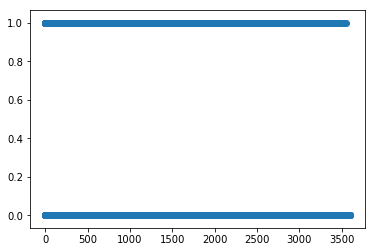

In [43]:
y = dm.block
x = dm.time_from_goal
plt.scatter(x, y)
plt.show()

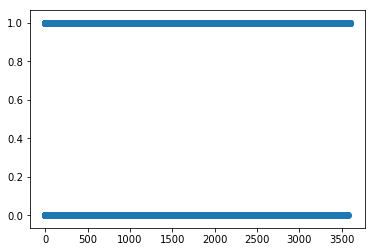

In [44]:
y = dm.faceoff
x = dm.time_from_goal
plt.scatter(x, y)
plt.show()

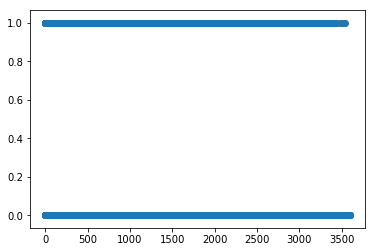

In [45]:
y = dm.giveaway
x = dm.time_from_goal
plt.scatter(x, y)
plt.show()

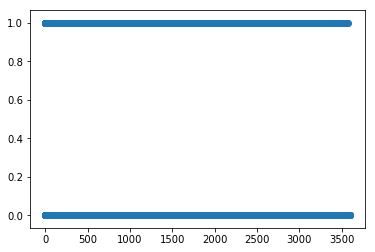

In [46]:
y = dm.hit
x = dm.time_from_goal
plt.scatter(x, y)
plt.show()

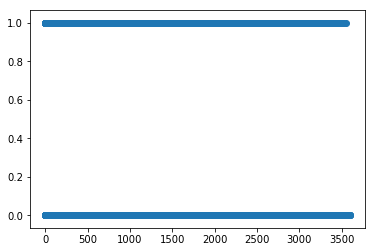

In [47]:
y = dm.miss
x = dm.time_from_goal
plt.scatter(x, y)
plt.show()

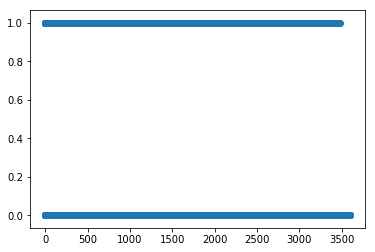

In [48]:
y = dm.penalty
x = dm.time_from_goal
plt.scatter(x, y)
plt.show()

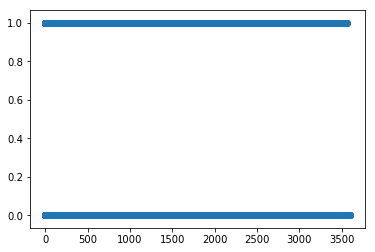

In [49]:
y = dm.shot
x = dm.time_from_goal
plt.scatter(x, y)
plt.show()

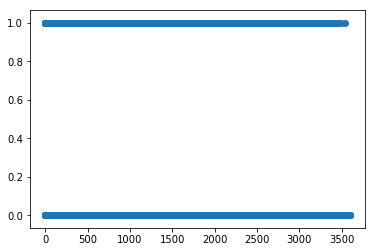

In [50]:
y = dm.takeaway
x = dm.time_from_goal
plt.scatter(x, y)
plt.show()

In [51]:
dm.head()

EventNumber  Period AdvantageType  EventTimeFromZero  \
Season GameNumber                                                         
2010   20001               1.0       1            EV                  0   
       20001               3.0       1            EV                 15   
       20001               4.0       1            EV                 46   
       20001               5.0       1            EV                 57   
       20001               6.0       1            EV                 69   

                   EventTimeFromTwenty EventType  \
Season GameNumber                                  
2010   20001                    1200.0       FAC   
       20001                    1185.0       HIT   
       20001                    1154.0       HIT   
       20001                    1143.0       HIT   
       20001                    1131.0      GIVE   

                                                         EventDetail  \
Season GameNumber                                                      
2010   20001       MTL won Neu. Zone - MTL #11 GOMEZ vs TOR #37 B...   
       20001             TOR #37 BRENT HIT MTL #26 GORGES, Off. Zone   
       20001           MTL #14 PLEKANEC HIT TOR #2 SCHENN, Off. Zone   
       20001           MTL #76 SUBBAN HIT TOR #15 KABERLE, Neu. Zone   
       20001              TOR&nbsp;GIVEAWAY - #35 GIGUERE, Def. Zone   

                   time_global  goal_time  time_from_goal  block  faceoff  \
Season GameNumber                                                           
2010   20001                 0      402.0           402.0      0        1   
       20001                15      402.0           387.0      0        0   
       20001                46      402.0           356.0      0        0   
       20001                57      402.0           345.0      0        0   
       20001                69      402.0           333.0      0        0   

                   giveaway  goal  hit  miss  penalty  shot  takeaway  
Season GameNumber                                                      
2010   20001              0     0    0     0        0     0         0  
       20001              0     0    1     0        0     0         0  
       20001              0     0    1     0        0     0         0  
       20001              0     0    1     0        0     0         0  
       20001              1     0    0     0        0     0         0